<a href="https://colab.research.google.com/github/DiegoMBrito/Sprint_3/blob/main/MVP_Sprint3_Diego_Brito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando e instalando algumas bibliotecas necessárias para executação deste notebook.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Definição do Projeto de engenharia de Dados

No cenário atual, o comércio eletrônico assume um papel proeminente na economia global, com um crescimento exponencial nas transações online. Diante desse contexto, as empresas de e-commerce estão inovando na utilização de dados para otimizar operações, compreender o comportamento do cliente e catalisar o desenvolvimento. Para alcançar esses objetivos, a Google Cloud Platform (GCP) será usada para criar um pipeline de dados abrangente. Esse processo envolve a busca, coleta e modelagem de informações provenientes de arquivos CSV, que são então incorporadas a um esquema estrela, viabilizando consultas SQL avançadas. Através dessa abordagem, será possível extrair insights valiosos de seus dados de e-commerce e, assim, embasar suas decisões estratégicas visando impulsionar o crescimento e o sucesso nos negócios.

## 2. Objetivo

Este trabalho tem como objetivo principal capacitar e otimizar o desempenho de vendas de uma rede varejista por meio de análises baseadas em dados. Utilizando consultas SQL avançadas em seu pipeline de dados, buscamos:

1. Identificar os 10 Produtos Mais Vendidos com Detalhes de Vendedores e Município: Apresentar os 10 produtos mais vendidos, suas categorias e os vendedores associados, juntamente com os respectivos municípios, para fornecer insights sobre produtos de alto desempenho e sua distribuição geográfica.

2. Analisar Desempenho de Vendedores por Departamento (por Município/Estado): Identificar os vendedores que alcançaram as maiores vendas, categorizados por departamento, em municípios ou estados específicos, oferecendo insights sobre áreas geográficas e categorias de produtos lucrativas.

3. Identificar o Produto Mais Vendido (10/2017 a 02/2018): Determinar qual produto registrou o maior volume de vendas durante o período de outubro de 2017 a fevereiro de 2018, possibilitando uma compreensão das demandas sazonais.

## 3. Busca dos dados

A busca pela base de dados foi feita em várias fontes públicas, como dados.gov.br, www.kaggle.com, ibge.gov.br, entre outras. Após algumas pesquisas, a base de dados escolhida foi a Brazilian E-Commerce Public Dataset by Olist (Brazilian E-Commerce Public Dataset by Olist | Kaggle). Base de dados publica que pode ser acessada pelo site Kaggle.

![Figura 1: Página web onde foi extraído o dataset.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/001.jpg)
Figura 1: Página web onde foi extraído o dataset.
                                                                          
 O conjunto de dados que possui 9 planilhas (figura 2) com informações de mais de 100 mil pedidos feitos entre 2016 e 2018 em vários marketplaces no Brasil. Suas características permitem visualizar um pedido de várias dimensões: desde o status do pedido, preço, pagamento e desempenho do frete até a localização do cliente, atributos do produto e, finalmente, avaliações das compras feitas pelos clientes.

![Figura 2: Página da web mostrando dos arquivos csv que serão usados neste trabalho.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/002.jpg)
Figura 2: Página da web mostrando dos arquivos csv que serão usados neste trabalho.

## 4. Modelagem dos dados

A modelagem de dados para este projeto foi realizada utilizando o software Power BI, oferecendo uma visualização clara das possíveis relações entre as diversas fontes de dados disponíveis. O processo de modelagem envolveu a criação de uma tabela central, denominada "Fato", que foi construída a partir da junção de duas tabelas-chave, a Order_Items e a Order, resultando na tabela Join_Order. As demais tabelas, tais como Payments, Customers, Products, Reviews e Sellers, foram utilizadas como "Dimensões" para compor o modelo Esquema Estrela (conforme mostrado na Figura 3).
No entanto, vale destacar que, nas relações entre a tabela fato e as tabelas dimensões Payments e Reviews, não foi possível utilizar a cardinalidade tradicional de "Um para Muitos" (1 : N). Isso se deve ao fato de que, em uma única ordem de venda, podem existir múltiplas formas de pagamento, bem como a possibilidade de múltiplos produtos gerarem avaliações (reviews) em uma única ordem de venda. Como resultado, essas tabelas apresentam uma relação de cardinalidade mais complexa, especificamente "Muitos para Muitos" (N:N), refletindo a capacidade de gerar múltiplas entradas em Payments e Reviews para uma única ordem de venda.


![Figura 3: Esquema estrela montado com tabelas.csv.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/003.jpg)

Figura 3: Esquema estrela montado com as tabelas.csv.

### 4.1 Catálogo de dados

O catálogo de dados funciona como um repositório centralizado que documenta e organiza metadados sobre os conjuntos de dados disponíveis. Através do catálogo de dados podemos entender, localizar e acessar os dados relevantes de maneira eficiente. Além disso, um catálogo bem elaborado ajuda a garantir a qualidade e a confiabilidade dos dados, fornecendo informações sobre a proveniência, transformações e atualizações realizadas nos dados ao longo do tempo.

### 4.1.1 Linhagem dos dados

A linhagem representa o rastreamento e o registro de todas as transformações e manipulações que os dados passam ao longo do caminho, desde sua origem até seu destino final, que neste caso, é o BQ do GCP. A finalidade da linhagem de dados é fornecer uma trilha completa e transparente de como os dados foram obtidos, limpos, transformados e carregados, garantindo a qualidade e a integridade dos dados ao longo do processo.

A figura 4 mostra todo o caminha percorrido pelos dados até serem ingeridos no dataset mvp_sprint3 dentro do BigQuery.

![Figura 4: Linhagem dos dados.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/linhagem_dados.jpg)

Figura 4: Linhagem dos dados.


Uma vez que o dado já está dentro do BQ, podemos ver a linhagem do dado dentro do GCP. A seguir, será ilustrado a linhagem dos dados de todas as tabelas que compoem o dataset mvp_sprint3.

![Figura 5: Linhagem dos dados do dataset Join_Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/064.jpg)
Figura 5: Linhagem dos dados do dataset Join_Order.

![Figura 6: Linhagem dos dados do dataset Customers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/065.jpg)
Figura 6: Linhagem dos dados do dataset Customers.

![Figura 7: Linhagem dos dados do dataset Geolocation.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/066.jpg)
Figura 7: Linhagem dos dados do dataset Geolocation.

![Figura 8: Linhagem dos dados do dataset Payments.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/067.jpg)
Figura 8: Linhagem dos dados do dataset Payments.

![Figura 9: Linhagem dos dados do dataset Products.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/Imagens2/068.jpg)
Figura 9: Linhagem dos dados do dataset Products.

![Figura 10: Linhagem dos dados do dataset Reviews.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/069.jpg)
Figura 10: Linhagem dos dados do dataset Reviews.

![Figura 11: Linhagem dos dados do dataset Sellers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/070.jpg)
Figura 11: Linhagem dos dados do dataset Sellers.

#### 4.1.2 Descrição dos dados

Essa etapa envolve a documentação de cada conjunto de dados, incluindo a origem, estrutura, formato e significado de cada campo. Além disso, a definição dos domínios dos dados ajuda a estabelecer limites e padrões para os valores esperados em cada coluna (pode ser visto no item Qualidade de dados), garantindo a consistência e a qualidade dos dados.

Todas as planilhas tem origem no site da Kaggle, já descrito nesse documento. Abaixo será exibido imagens com o esquema de cada dataset.

![Figura 12: Descrição da tabela Join_Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/47.jpg)
Figura 12: Descrição da tabela Join_Order.


![Figura 13: Descrição da tabela Customers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/48.jpg)
Figura 13: Descrição da tabela Customers.


![Figura 14: Descrição da tabela Geolocation.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/49.jpg)
Figura 14: Descrição da tabela Geolocation.


![Figura 15: Descrição da tabela Payments.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/50.jpg)
Figura 15: Descrição da tabela Payments.


![Figura 16: Descrição da tabela Products.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/51.jpg)
Figura 16: Descrição da tabela Products.


![Figura 17: Descrição da tabela Reviews.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/52.jpg)
Figura 17: Descrição da tabela Reviews.


![Figura 18: Descrição da tabela Sellers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/53.jpg)
Figura 18: Descrição da tabela Sellers.


#### 4.1.3 Verificação da qualidade dos dados

A verificação da qualidade dos dados nos pipelines do GCP é fundamental para garantir a confiabilidade das informações ao longo do ciclo de vida dos dados. Para garantir essa qualidade, foi usado o Dataplex, que desempenha um papel essencial nesse processo. Com o Dataplex, é possível implementar verificações de exclusividade para garantir que os dados não contenham duplicatas indesejadas, assegurando a integridade dos conjuntos de dados. Além disso, a verificação de intervalo ajuda a validar se os dados numéricos estão dentro dos limites desejados, o que é fundamental para a consistência e a precisão das informações. Através do uso desta ferramenta, foi possível realizar a verificação de valores máximo e mínimos para colunas númericas, assim como de exclusividade para as categóricas. Abaixo será ilustrado as imagens com a verificação dos dados dentro do BQ.

![Figura 19: Verificação da qualidade dos dados da tabela Join_Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/40.jpg)
Figura 19: Verificação da qualidade dos dados da tabela Join_Order.


![Figura 20: Verificação da qualidade dos dados da tabela Customers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/41.jpg)
Figura 20: Verificação da qualidade dos dados da tabela Customers.


![Figura 21: Verificação da qualidade dos dados da tabela Geolocation.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/42.jpg)
Figura 21: Verificação da qualidade dos dados da tabela Geolocation.


![Figura 22: Verificação da qualidade dos dados da tabela Payments.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/43.jpg)
Figura 22: Verificação da qualidade dos dados da tabela Payments.


![Figura 23: Verificação da qualidade dos dados da tabela Products.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/44.jpg)
Figura 23: Verificação da qualidade dos dados da tabela Products.


![Figura 24: Verificação da qualidade dos dados da tabela Reviews.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/45.jpg)
Figura 24: Verificação da qualidade dos dados da tabela Reviews.


![Figura 25: Verificação da qualidade dos dados da tabela Sellers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/46.jpg)
Figura 25: Verificação da qualidade dos dados da tabela Sellers.

## 5. Carga dos dados

Nesse tópico será mostrado o passo a passo de Extração, Transformação e Carga (ETL) de todos os datasets no Google Cloud Plataform (GCP). O primeiro passo a ser feito será a criação de buckets, estes são usados para organizar e controlar o acesso aos dados, porém são diferentes de diretórios e pastas, pois não é possível aninhar buckets (fonte: https://cloud.google.com/storage/docs/buckets?hl=pt-br#buckets).

### 5.1 Criando buckets

Para criar um buckets, é preciso acessar a página do seu GCP e ir nas opções de ferramentas -> Claud Storage -> bucktes. As figuras 26 , 27 e 28 mostram o passo a passo desse acesso para criação.


![Figura 26: Passo a passo de criação de um buckets.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/004.jpg)
Figura 26: Passo a passo de criação de um buckets.



![Figura 27: Passo a passo de criação de um buckets.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/005.jpg)
Figura 27: Passo a passo de criação de um buckets.


Como descrito na aula, criarei também um buckets temporário, pois está será usado para armazenamento de alguns arquivos temporários do Data Fusion, que será instanciado em breve.

![Figura 28: Passo a passo de criação de um buckets.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/006.jpg)
Figura 28: Passo a passo de criação de um buckets.



Após a criação do bucket mvp-sprint3, irei armazenar todas as tabelas extraídas do KAGGLE neste local, como mostra a figura 29.

![Figura 29: Tabelas armazendas no buckets mvp-sprint3.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/011.jpg)
Figura 29: Tabelas armazendas no buckets mvp-sprint3.

### 5.2 Criando datasets dentro do BigQuery

O próximo passo será criar os datasets no BigQuery (BQ) do GCP. Esta opção permite escolher o conjunto de recursos certo para requisitos de carga de trabalho individuais, com a possibilidade de fazer combinações para encontrar o melhor escalonamento automático de capacidade de computação que adiciona recursos de computação refinados em tempo real para corresponder às necessidades das cargas de trabalho (fonte: Data warehouse empresarial do BigQuery  |  Google Cloud).

![Figura 30: Abrindo o BigQuery no GCP.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/007.jpg)
Figura 30: Abrindo o BigQuery no GCP.

Dentro do BQ, iriei criar os datasets que serão armazenados no “banco de dados” mvp_sprint3, como ilustrado  nas figuras 31 e 32.

![Figura 31: Criando o dataset no BigQuery.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/008.jpg)
Figura 31: Criando o dataset no BigQuery.

![Figura 32: Criando o dataset no BigQuery.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/009.jpg)
Figura 32: Criando o dataset no BigQuery.

![Figura 33: Dataset criado no BigQuery.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/010.jpg)
Figura 33: Dataset criado no BigQuery.

O próximo passo será criar uma instância do Data Fusion para poder fazer todo o processo de transformação necessários para as queries.

O Data Fusion do Google Cloud Platform (GCP) é uma plataforma de integração de dados totalmente gerenciada que simplifica e agiliza o processo de coleta, transformação e movimentação de dados em ambientes de nuvem. Ele oferece uma interface visual intuitiva para a criação de pipelines de dados, permitindo que os usuários definam facilmente fluxos de trabalho para extrair, transformar e carregar (ETL) dados de várias fontes para os serviços de dados do GCP, como o BigQuery e o Data Warehouse. O Data Fusion também suporta integração com fontes de dados locais e na nuvem, garantindo uma abordagem flexível para a ingestão de dados.

![Figura 34: Criação da inatância mvp-sprint3 no Data Dusion.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/001.jpg)
Figura 34: Criação da inatância mvp-sprint3 no Data Dusion.


![Figura 35: Criação da inatância mvp-sprint3 no Data Dusion.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/002.jpg)
Figura 35: Criação da inatância mvp-sprint3 no Data Dusion.

Com a instância do Data Fusion criada, posso começar a fazer o processo de Extração, Transformação e Carga (ETL) dos dados para o dentro do dataset mvp_sprint3 no BigQuery.

Para simular um esquema estrela, fiz o join de dois datasets dos 8 que irei usar para que sirva de tabela Fato, sendo eles o Ordes e Orders_itens. Os demais datasets foram inseridos individualmente no Fusion, desta forma eles simularam as tabelas dimensão.

Os dados passaram pelos seguintes serviços disponíveis no Data Fusion:

- Google Cloud Storage (GCS), é frequentemente utilizado como um repositório de dados de entrada e saída para pipelines de ETL e processamento de dados. Os usuários podem ler dados de arquivos armazenados no GCS, transformá-los usando o Data Fusion e, em seguida, carregá-los de volta no GCS ou em outros serviços do GCP, como o BigQuery, para análise posterior.

- Wrangler, é uma ferramenta que facilita a limpeza, transformação e preparação de dados para análises. Projetado para simplificar o processo de ETL e é especialmente útil para aqueles que desejam manipular dados de forma eficiente, sem a necessidade de escrever código.

- Joiner, permite aos usuários realizar junções de dados de forma visual e interativa. Com ele podemos combinar conjuntos de dados diferentes usando uma chave de junção específica. Por exemplo, você pode unir dados de clientes de uma tabela com dados de pedidos de outra tabela, usando o ID do cliente como chave de junção, para criar um conjunto de dados combinado que inclua informações de ambos os conjuntos de dados.

- BigQuery (BQ), nos permite executar operações diretamente no BQ dentro do fluxo de dados do Data Fusion. Você pode criar, ler, atualizar ou excluir tabelas no BQ, bem como executar consultas SQL complexas como parte do processo de ETL ou análise de dados.

Todo o processo de ETL no DataFusion será ilustrado por imagens a seguir.

##### 5.2.1 ETL do dataset Join_Order

Irei mostrar esse ETL mais detalhadamente para mostrar o fluxo utilizado. OS demais ETLs irei mostrar somente a imagem de cada passo finalizado.

- GCS da tabela Order

![Figura 35: GCS da tabela Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/003.jpg)
Figura 35: GCS da tabela Order.

![Figura 36: GCS da tabela Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/004.jpg)
Figura 36: GCS da tabela Order.

![Figura 37: GCS da tabela Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/005.jpg)
Figura 37: GCS da tabela Order.

![Figura 38: GCS da tabela Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/006.jpg)
Figura 38: GCS da tabela Order.

- GCS da tabela Order_Itens

![Figura 39: GCS da tabela Order_Items.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/007.jpg)
Figura 39: GCS da tabela Order_Items.

- Wrangle da tabela Order
Foi necessário realizar a transformação das culunas tipo data/time, pois elas estavam como string. Tranformei todas as culunas para o tipo data/time customizado para o padrão do meu dado, dd/MM/yyyy HH:mm, nesse passo.

![Figura 40: Wrangle da tabela Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/011.jpg)
Figura 40: Wrangle da tabela Order.

![Figura 41: Wrangle da tabela Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/013.jpg)
Figura 41: Wrangle da tabela Order.

![Figura 42: Wrangle da tabela Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/014.jpg)
Figura 42: Wrangle da tabela Order.

![Figura 43: Wrangle da tabela Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/016.jpg)
Figura 43: Wrangle da tabela Order.

- Wrangle da tabela Order_Items
Nessa tabela também foi necessário transformar colunas que estavam com double para float, assim como a transformação para data/time.

![Figura 44: Wrangle da tabela Order_Items.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/019.jpg)
Figura 44: Wrangle da tabela Order_Items.

![Figura 45: Wrangle da tabela Order_Items.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/020.jpg)
Figura 45: Wrangle da tabela Order_Items.

- Join das tabelas Order e Order_Items
Para fazer o join entre essas duas tabelas, removi da tabela final a coluna order_id da tabela order_items

![Figura 46: Join da tabela Order e Order_Items.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/022.jpg)
Figura 46: Join da tabela Order e Order_Items.

![Figura 47: Join da tabela Order e Order_Items.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/023.jpg)
Figura 47: Join da tabela Order e Order_Items.

- BigQuery da tabela Join_Orders

![Figura 48: BQ da tabela Order e Order_Items.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/025.jpg)
Figura 48: BQ da tabela Order e Order_Items.

![Figura 48: BQ da tabela Order e Order_Items.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/026.jpg)
Figura 48: BQ da tabela Order e Order_Items.

- Carga do dataset Join_Orders no BQ

![Figura 49: Carga do dataset no Join_Order.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/028.jpg)
Figura 49: Carga do dataset no Join_Order.

##### 5.2.2 ETL do dataset Customers

- GCS da tabela Customers

![Figura 50: GCS da tabela Customers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/030.jpg)
Figura 50: GCS da tabela Customers.

- BigQuery da tabela Customers

![Figura 51: BQ da tabela Customers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/031.jpg)
Figura 51: BQ da tabela Customers.

![Figura 52: BQ da tabela Customers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/032.jpg)
Figura 52: BQ da tabela Customers.

- Carga do dataset Customers no BQ

![Figura 53: Carga do dataset no Customers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/037.jpg)
Figura 53: Carga do dataset no Customers.

##### 5.2.3 ETL do dataset Geolocation

- GCS da tabela Geolocation

![Figura 54: GCS da tabela Geolocation.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/034.jpg)
Figura 54: GCS da tabela Geolocation.

- BigQuery da tabela Geolocation

![Figura 55: BQ da tabela Geolocation.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/035.jpg)
Figura 55: BQ da tabela Geolocation.

![Figura 56: BQ da tabela Geolocation.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/036.jpg)
Figura 56: BQ da tabela Geolocation.

- Carga do dataset Geolocation no BQ

![Figura 57: Carga do dataset no Geolocation.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/038.jpg)
Figura 57: Carga do dataset no Geolocation.

##### 5.2.4 ETL do dataset Payments

- GCS da tabela Payments

![Figura 58: GCS da tabela Payments.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/039.jpg)
Figura 58: GCS da tabela Payments.

- Wrangle da tabela Payments

![Figura 59: GCS da tabela Payments.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/040.jpg)
Figura 59: GCS da tabela Payments.

- BigQuery da tabela Payments

![Figura 60: BQ da tabela Payments.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/041.jpg)
Figura 60: BQ da tabela Payments.

![Figura 61: BQ da tabela Payments.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/042.jpg)
Figura 61: BQ da tabela Payments.

- Carga do dataset Payments no BQ

![Figura 62: Carga do dataset no Payments.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/059.jpg)
Figura 62: Carga do dataset no Payments.

##### 5.2.5 ETL do dataset Prodcts

- GCS da tabela Products

![Figura 63: GCS da tabela Products.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/044.jpg)
Figura 63: GCS da tabela Products.

- Wrangle da tabela Products

![Figura 64: GCS da tabela Products.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/045.jpg)
Figura 64: GCS da tabela Products.

- BigQuery da tabela Products

![Figura 65: BQ da tabela Products.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/046.jpg)
Figura 65: BQ da tabela Products.

![Figura 66: BQ da tabela Products.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/047.jpg)
Figura 66: BQ da tabela Products.

- Carga do dataset Products no BQ

![Figura 67: Carga do dataset no Products.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/060.jpg)
Figura 67: Carga do dataset no Products.

##### 5.2.6 ETL do dataset Reviews

- GCS da tabela Reviews

![Figura 68: GCS da tabela Reviews.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/050.jpg)
Figura 68: GCS da tabela Reviews.

- Wrangle da tabela Reviews

![Figura 69: GCS da tabela Reviews.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/051.jpg)
Figura 69: GCS da tabela Reviews.

- BigQuery da tabela Reviews

![Figura 70: BQ da tabela Reviews.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/052.jpg)
Figura 70: BQ da tabela Reviews.

![Figura 71: BQ da tabela Reviews.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/053.jpg)
Figura 71: BQ da tabela Reviews.

- Carga do dataset Reviews no BQ

![Figura 72: Carga do dataset no Reviews.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/061.jpg)
Figura 72: Carga do dataset no Reviews.

##### 5.2.7 ETL do dataset Sellers

- GCS da tabela Sellers

![Figura 73: GCS da tabela Sellers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/055.jpg)
Figura 73: GCS da tabela Sellers.

- BigQuery da tabela Sellers

![Figura 74: BQ da tabela Sellers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/056.jpg)
Figura 74: BQ da tabela Sellers.

![Figura 75: BQ da tabela Sellers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/057.jpg)
Figura 75: BQ da tabela Sellers.

- Carga do dataset Sellers no BQ

![Figura 76: Carga do dataset no Sellers.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/062.jpg)
Figura 76: Carga do dataset no Sellers.

A seguir será mostrado a lista com a carga de todos os datasets no BigQuery.

![Figura 77: Carga de todos os dataset no BQ.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens2/063.jpg)
Figura 77: Carga de todos os dataset no BQ.

## 6. Análise

### 6.1 Qualidade dos dados

Esse tópico já foi abordado no item Catálogo de dados!

### 6.2 Solução do problema

As consultas em SQL relacionadas à venda de produtos em uma loja de e-commerce são fundamentais para a tomada de decisões estratégicas e o aprimoramento de diversos setores do negócio. Elas permitem analisar dados de vendas, produtos, clientes e vendedores, possibilitando melhorias significativas em áreas como gestão de estoque, marketing, atendimento ao cliente, alocação de recursos humanos, entre outras. Através dessas consultas, a empresa pode identificar tendências de compra, produtos mais populares, eficácia de campanhas de marketing, além de otimizar a alocação de recursos e pessoal para impulsionar o crescimento do e-commerce e melhorar a experiência do cliente.

#### 6.2.1 1ª consulta

Quais os 10 produtos mais vendidos, mostrando a categoria de cada um e por quais vendedores?

Os resultados dessa análise podem revelar quais produtos têm maior demanda, permitindo que a empresa ajuste sua estratégia de estoque e marketing. Além disso, ao vincular os vendedores aos produtos, é possível reconhecer quais lojas estão mais eficazes na venda de cada item, incentivando práticas de vendas bem-sucedidas. Essa análise também pode ajudar a identificar oportunidades de crescimento, como a possibilidade de expandir o estoque dos produtos mais vendidos ou treinar outros vendedores para promover esses produtos de maneira mais eficaz.

Consulta SQL no BIGQuery

WITH ProductSales AS (
    
    SELECT
        JO.product_id,
        P.product_category_name,
        S.seller_id,
        S.seller_city,
        SUM(JO.price) AS total_vendido

    FROM
        `sacred-atom-397911.mvp_teste_1.Join_Order` AS JO

    JOIN
        `sacred-atom-397911.mvp_teste_1.Products` AS P ON JO.product_id = P.product_id

    JOIN
        `sacred-atom-397911.mvp_teste_1.Sellers` AS S ON JO.seller_id = S.seller_id

    GROUP BY
        JO.product_id, S.seller_id, P.product_category_name, S.seller_city
)

SELECT *

FROM
    ProductSales

ORDER BY
    total_vendido DESC
    
LIMIT 10;

![Figura 78: Código em SQL para responder a primeira consulta.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/55.jpg)
Figura 78: Código em SQL para responder a primeira consulta.

In [2]:
# Importa dados da tabela referente ao resultado da 1ª consulta do repositório github

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Resposta_BQ/10_mais_vendidos.csv"

# Lê o arquivo .csv
itens_mais_vendidos = pd.read_csv(url, sep=',')

# Verifica o tipo de earth
print(type(itens_mais_vendidos))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# exibi o dataset
itens_mais_vendidos

,product_id,product_category_name,seller_id,seller_city,total_vendido
0,bb50f2e236e5eea0100680137654686c,beleza_saude,f7ba60f8c3f99e7ee4042fdef03b70c4,sao bernardo do campo,63560.00000
1,6cdd53843498f92890544667809f1595,beleza_saude,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,53652.29929
2,d6160fb7873f184099d9bc95e30376af,pcs,53243585a1d6dc2643021fd1853d8905,lauro de freitas,45949.34998
3,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,a1043bafd471dff536d0c462352beb48,ilicinea,45620.56046
4,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,4a3ca9315b744ce9f8e9374361493884,ibitinga,41542.50068
5,3dd2a17168ec895c781a9191c1e95ad7,informatica_acessorios,de722cd6dad950a92b7d4f82673f8833,recife,40782.79834
6,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,834f3294fba9f932f56edc879193f925,araraquara,37733.89996
7,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,955fee9216a65b617aa5c0531780ce60,sao paulo,37104.30062
8,25c38557cf793876c5abdd5931f922db,bebes,5dceca129747e92ff8ef7a997dc4f8ca,santa barbara d'oeste,31774.32007
9,f1c7f353075ce59d8a6f3cf58f419c9c,cama_mesa_banho,37be5a7c751166fbc5f8ccba4119e043,sao paulo,29792.35999


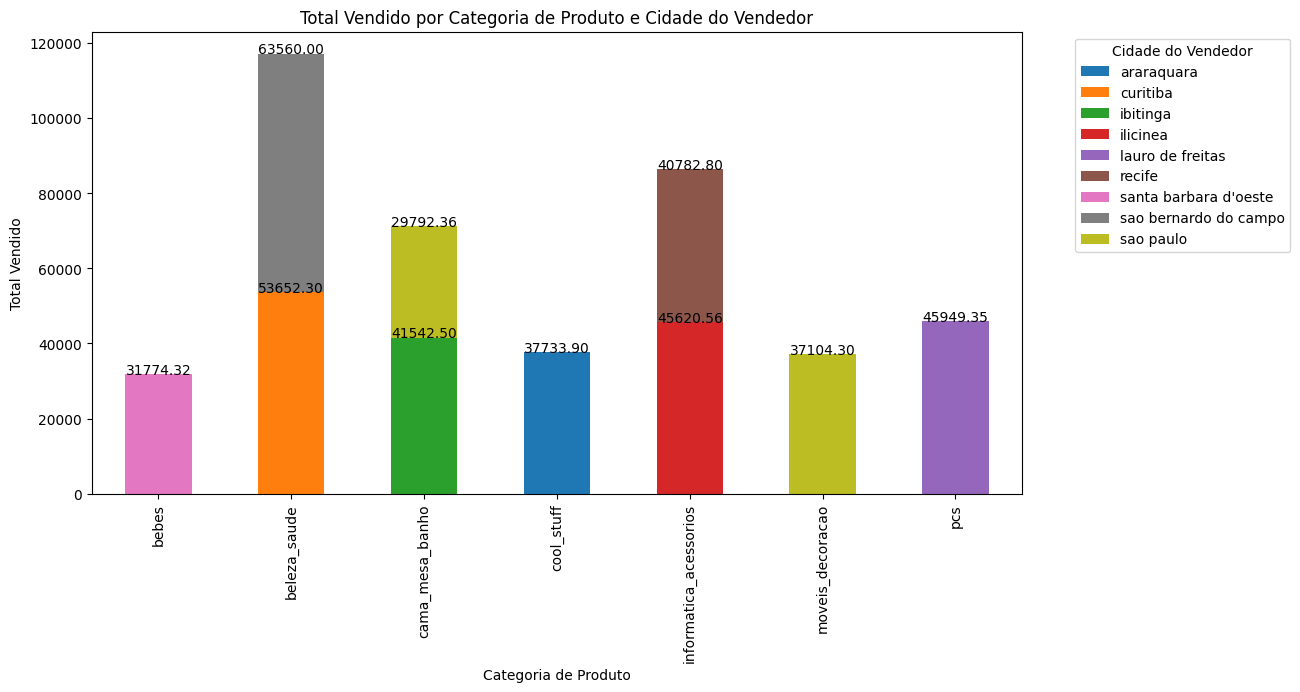

In [4]:
# Criação de um gráfico em barras empilhadas para melhor visualização dos dados da planilha

# Agrupar os dados por categoria de produto e cidade do vendedor, somando as vendas
df_grouped = itens_mais_vendidos.groupby(['product_category_name', 'seller_city'])['total_vendido'].sum().unstack().fillna(0)

# Criar um gráfico de barras empilhadas
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Categoria de Produto')
plt.ylabel('Total Vendido')
plt.title('Total Vendido por Categoria de Produto e Cidade do Vendedor')
plt.legend(title='Cidade do Vendedor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar os valores acima das barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:  # Verificar se o valor é diferente de zero
        ax.annotate(f'{height:.2f}', (x + width/2, y + height), ha='center')

plt.show()

#### Discussão do resultado da 1ª consulta

Com base na análise do gráfico, notamos que os produtos da categoria 'beleza_saude' são os mais procurados pelos clientes, seguidos de perto pelos produtos relacionados a 'pcs' e 'informatica_acessorios'. Juntas, essas três categorias representam aproximadamente 58,38% do total das 10 categorias mais procuradas. Esses dados destacam a importância de concentrar esforços em otimizar o estoque e a promoção dessas categorias, pois elas têm um grande apelo junto aos clientes. Além disso, devesse considerar estratégias para impulsionar ainda mais as vendas dessas categorias líderes, como campanhas de marketing específicas e parcerias com fornecedores de destaque.


#### 6.2.2 2ª consulta

Quais vendedores realizaram as maiores vendas e de qual departamento em cada município/estado?

Os resultados dessa análise podem destacar quais lojas parceiras estão se empenhando nas vendas, permitindo reconhecimento e incentivo aos mesmos. Além disso, ao relacionar essas vendas com departamentos específicos, a empresa pode identificar quais categorias de produtos ou linhas de negócios estão tendo o melhor desempenho em cada localidade, possibilitando ajustes na oferta de produtos ou na alocação de recursos. Essa análise pode ajudar a otimizar a estratégia de vendas, concentrando esforços nas áreas mais lucrativas e garantindo uma melhor compreensão do comportamento dos consumidores em diferentes regiões.

Consulta SQL no BIGQuery

WITH SellerSales AS (

    SELECT
        S.seller_id,
        C.customer_city,
        P.product_category_name,
        SUM(JO.price) AS total_vendido

    FROM
        `sacred-atom-397911.mvp_teste_1.Sellers` AS S

    JOIN
        `sacred-atom-397911.mvp_teste_1.Join_Order` AS JO ON S.seller_id = JO.seller_id

    JOIN
        `sacred-atom-397911.mvp_teste_1.Products` AS P ON JO.product_id = P.product_id

    JOIN
        `sacred-atom-397911.mvp_teste_1.Customers` AS C ON JO.customer_id = C.customer_id

    WHERE
        C.customer_city = 'niteroi'

    GROUP BY
        S.seller_id, C.customer_city, P.product_category_name
)

SELECT
    SS.customer_city,
    SS.product_category_name,
    SS.seller_id,
    SS.total_vendido AS maior_venda

FROM
    SellerSales AS SS

JOIN (

    SELECT
        customer_city,
        product_category_name,
        MAX(total_vendido) AS max_venda

    FROM
        SellerSales

    GROUP BY
        customer_city, product_category_name
) AS MaxSales ON SS.customer_city = MaxSales.customer_city
            AND SS.product_category_name = MaxSales.product_category_name
            AND SS.total_vendido = MaxSales.max_venda
            
ORDER BY
    SS.total_vendido DESC;

    
![Figura 79: Código em SQL para responder a segunda consulta.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/59.jpg)
Figura 79: Código em SQL para responder a segunda consulta.

Esse código é altamente flexivél e nos dá a liberdade de estudar um único munipio e/ou estado, ainda é possível inseir mais de uma município/estado para a consulta. Para tal, basta incluir desta forma, WHERE C.customer_city (state) = 'niteroi' OR C.customer_city (state) = 'petropolis'. Desta forma, so venderes de Petrópolis seriam incluídos no resultado junto com os de Niterói.

In [5]:
# Importa dados da tabela referente ao resultado da 2ª consulta do repositório github

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Resposta_BQ/vendas_depart_munic_estado2.csv"

# Lê o arquivo .csv
vendas_depart_munic_estado = pd.read_csv(url, sep=',')

# Verifica o tipo de earth
print(type(vendas_depart_munic_estado))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# exibi o dataset
vendas_depart_munic_estado.head(10)

,customer_city,product_category_name,seller_id,maior_venda
0,niteroi,relogios_presentes,2bf6a2c1e71bbd29a4ad64e6d3c3629f,4400.00
1,niteroi,eletrodomesticos_2,e882b2a25a10b9c057cc49695f222c19,2110.00
2,niteroi,moveis_escritorio,7c67e1448b00f6e969d365cea6b010ab,2018.23
3,niteroi,cama_mesa_banho,da8622b14eb17ae2831f4ac5b9dab84a,1663.60
4,niteroi,fashion_bolsas_e_acessorios,b372ee768ed69e46ca8cdbd267aa7a38,1650.00
5,niteroi,perfumaria,620c87c171fb2a6dd6e8bb4dec959fc6,1506.00
6,niteroi,pcs,53243585a1d6dc2643021fd1853d8905,1437.00
7,niteroi,beleza_saude,458d868c9642f55f18f04e951a3fdde6,1359.00
8,niteroi,esporte_lazer,218d46b86c1881d022bce9c68a7d4b15,1299.00
9,niteroi,moveis_decoracao,1025f0e2d44d7041d6cf58b6550e0bfa,1270.80


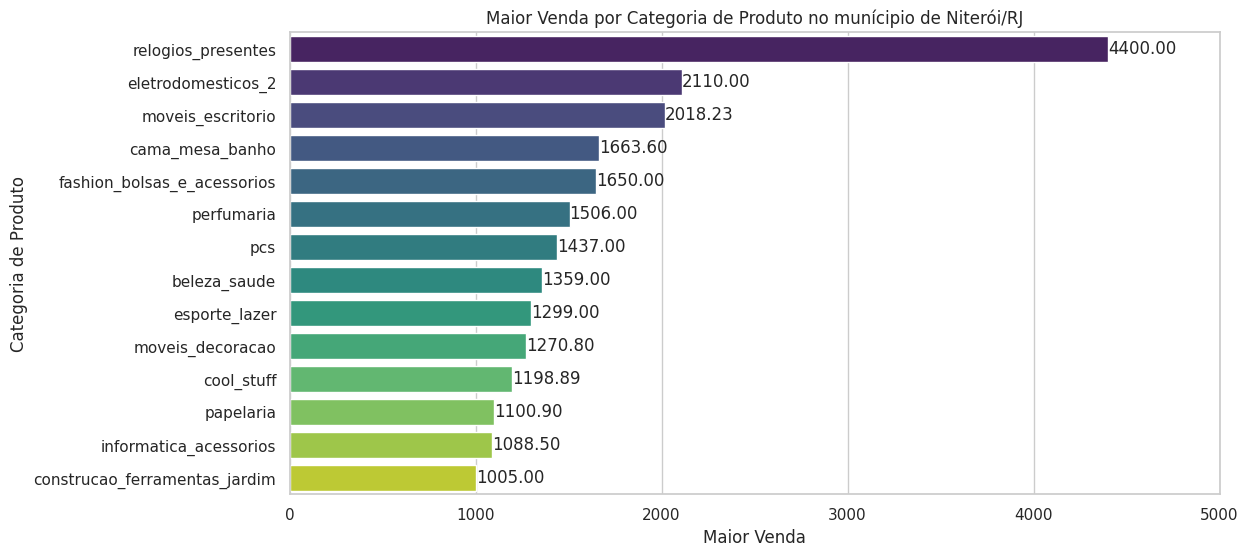

In [7]:
# Criação de um gráfico em barras horizontais para melhor visualização dos dados da planilha


# Ordenar o DataFrame pelo valor das maiores vendas
df_sorted = vendas_depart_munic_estado.sort_values(by='maior_venda', ascending=False)

# Configuração do estilo do Seaborn
sns.set(style="whitegrid")

# Criar um gráfico de barras horizontais com cores diferentes para cada categoria
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='maior_venda', y='product_category_name', data=df_sorted, palette='viridis')
plt.xlabel('Maior Venda')
plt.ylabel('Categoria de Produto')
plt.title('Maior Venda por Categoria de Produto no munícipio de Niterói/RJ')

# Definir os marcadores do eixo x em intervalos de 50.000
ax.set_xticks(np.arange(0, df_sorted['maior_venda'].max() + 1000, 1000))

# Adicionar o valor da maior venda ao lado de cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', va='center')

plt.show()

#### Discussão do resultado da 2ª consulta

Os itens mais procurados, como aqueles da categoria 'relogios_presentes', desempenham um papel fundamental nas vendas do munícipio de Niterói/RJ com 23,5% do total das vendas no período analisado, refletindo o interesse e as preferências dos clientes. Para aumentar as vendas de outros itens, é essencial adotar medidas que possam destacar os produtos populares com promoções e campanhas direcionadas para mantê-los em foco. Ao mesmo tempo, é importante diversificar o mix de produtos nas categorias menos populares, trazendo novos produtos e marcas, e investir em conteúdo informativo e atrativo para chamar a atenção dos clientes sobre as vantagens e usos desses itens. Além disso, a análise de dados contínua pode ajudar a identificar tendências emergentes e oportunidades de mercado para expandir as categorias menos procuradas.

#### 6.2.3 3ª consulta

Entre os meses de 10/2017 e 02/2018, qual produto foi o mais vendido?

Os resultados dessa análise podem destacar não apenas o produto de maior demanda, mas também oferecer insights sobre as preferências dos clientes e as tendências sazonais de compra. Isso permite que a empresa ajuste seu estoque e estratégias de marketing para atender às necessidades dos clientes de forma mais eficaz. Além disso, a análise dos resultados pode revelar oportunidades de promoção ou destaque para o produto mais vendido, impulsionando ainda mais as vendas.

Consulta SQL no BIGQuery

WITH ApprovedOrders AS (

    SELECT
        JO.order_id,
        JO.customer_id,
        JO.product_id,
        P.product_category_name,

        PARSE_TIMESTAMP('%d/%m/%Y %H:%M', JO.order_approved_at) AS approved_datetime,

        COUNT(*) AS quantidade_vendida,

        SUM(JO.price) AS total_vendido

    FROM
        `sacred-atom-397911.mvp_teste_1.Join_Order` AS JO

    JOIN
        `sacred-atom-397911.mvp_teste_1.Products` AS P ON JO.product_id = P.product_id

    WHERE
        PARSE_TIMESTAMP('%d/%m/%Y %H:%M', JO.order_approved_at) BETWEEN TIMESTAMP('2017-10-01 00:00:00') AND TIMESTAMP('2018-02-28 23:59:59')

    GROUP BY
        JO.order_id, JO.customer_id, JO.product_id, P.product_category_name, approved_datetime
)

SELECT

    AO.order_id,
    AO.product_category_name,
    AO.approved_datetime,
    C.customer_city,
    C.customer_state,
    AO.quantidade_vendida,
    AO.total_vendido

FROM
    ApprovedOrders AS AO

JOIN
    `sacred-atom-397911.mvp_teste_1.Customers` AS C ON AO.customer_id = C.customer_id

ORDER BY
    total_vendido DESC

LIMIT 10;



![Figura 80: Código em SQL para responder a terceira consulta.](https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Imagens/68.jpg)
Figura 80: Código em SQL para responder a terceira consulta.

In [8]:
# Importa dados da tabela referente ao resultado da 3ª consulta do repositório github

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/DiegoMBrito/Sprint_3/main/MVP/Resposta_BQ/mes_menos_venda.csv"

# Lê o arquivo .csv
mes_menos_venda = pd.read_csv(url, sep=',')

# Verifica o tipo de earth
print(type(mes_menos_venda))

<class 'pandas.core.frame.DataFrame'>


In [9]:
# exibi o dataset
mes_menos_venda

,order_id,product_category_name,approved_datetime,customer_city,customer_state,quantidade_vendida,total_vendido
0,03caa2c082116e1d31e67e9ae3700499,telefonia_fixa,2017-10-02 15:28:00.000000 UTC,rio de janeiro,RJ,8,13440.000000
1,2cc9089445046817a7539d90805e6e5a,agro_industria_e_comercio,2017-11-28 12:55:00.000000 UTC,divinopolis,MG,6,5934.599854
2,a53e05ecd2ed1f46a2b8e1f5828be7c6,esporte_lazer,2018-01-27 14:35:00.000000 UTC,para de minas,MG,1,3690.000000
3,66b9c991ee308f9342f6a7f63bb68251,telefonia_fixa,2018-02-11 14:35:00.000000 UTC,luis eduardo magalhaes,BA,2,3300.000000
4,f398a143c0fe171d965db2096cf064cf,beleza_saude,2017-12-17 09:30:00.000000 UTC,santa maria,RS,1,3124.000000
5,31e50461be6957a749166e97af082d0a,construcao_ferramentas_seguranca,2018-02-09 16:50:00.000000 UTC,divinopolis,MG,1,3099.899902
6,0af28d87520565eb3b57c9b2abe1a2cc,pcs,2017-10-05 20:28:00.000000 UTC,curitiba,PR,1,2999.989990
7,d9956b0805e324db3f2a546ef216c10b,pcs,2017-10-10 15:06:00.000000 UTC,angra dos reis,RJ,1,2999.989990
8,d7a2c0c1ff66b314f3bf166fb4157fd4,agro_industria_e_comercio,2017-11-20 22:39:00.000000 UTC,trindade,PE,1,2990.000000
9,d3fc45461660252856d603ed31eb4e77,beleza_saude,2017-11-21 03:59:00.000000 UTC,ourinhos,SP,1,2899.000000


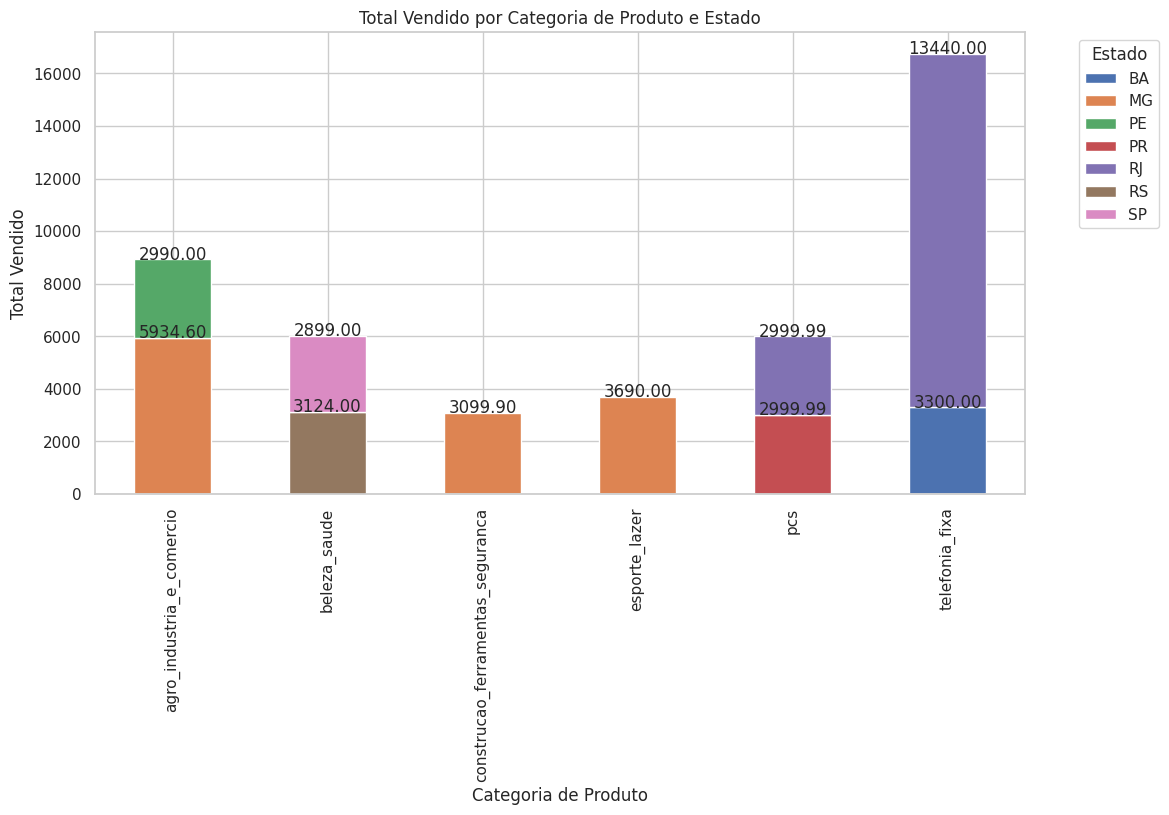

In [10]:
# Criação de um gráfico em barras empilhadas para melhor visualização dos dados da planilha


# Agrupar os dados por categoria de produto e estado, somando as vendas
df_grouped = mes_menos_venda.groupby(['product_category_name', 'customer_state'])['total_vendido'].sum().unstack().fillna(0)

# Criar um gráfico de barras empilhadas
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Categoria de Produto')
plt.ylabel('Total Vendido')
plt.title('Total Vendido por Categoria de Produto e Estado')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar os valores acima das barras, excluindo os valores iguais a zero
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.2f}', (x + width/2, y + height), ha='center')

plt.show()

#### Discussão do resultado da 3ª consulta

Ao analisar o gráfico, fica evidente que a categoria 'telefonia_fixa' liderou as vendas durante o período de outubro de 2017 a fevereiro de 2018, contribuindo significativamente com 23,13% do volume total de vendas. Essa alta demanda pode ser atribuída a sazonalidades ou a um aumento repentino de interesse nessa categoria. Além disso, a categoria 'agro_industria_comercio' também teve um desempenho notável, representando 12,33% do montante total de vendas, sugerindo uma demanda constante nesse segmento para os estados consumidores. Esses insights são valiosos para orientar a estratégia de estoque e marketing, permitindo que a empresa aproveite as tendências de consumo e ajuste suas operações de acordo com o consumo dos clientes.

#### Discussão geral dos resultados

Com base nas análises realizadas, pode-se sugeir um conjunto de estratégias gerais para aumentar as vendas em todas as categorias:

- Otimização das Categorias Populares: Dada a forte demanda por categorias como 'beleza_saude', 'pcs' e 'informatica_acessorios', é fundamental manter um estoque consistente e criar campanhas de marketing específicas para essas categorias. Parcerias com fornecedores de destaque nessas áreas também podem impulsionar ainda mais as vendas.
- Diversificação de Produtos: Para categorias menos populares, como as destacadas em Niterói/RJ, como 'relogios_presentes', é importante diversificar o mix de produtos e destacar produtos populares com promoções e campanhas direcionadas para mantê-los em foco. Além disso, a introdução de novos produtos e marcas nessas categorias pode atrair a atenção dos clientes.
- Conteúdo Informativo: Investir em conteúdo informativo e atrativo é crucial para destacar as vantagens e usos dos produtos menos populares. Isso pode incluir guias de compras, análises de produtos e demonstrações para ajudar os clientes a entender o valor desses itens.
- Análise Contínua de Dados: A análise contínua de dados é essencial para identificar tendências emergentes e oportunidades de mercado. Isso permite que a empresa se adapte rapidamente às mudanças nas preferências dos clientes e ajuste suas estratégias de estoque e marketing de acordo.

Ao adotar essas estratégias, a loja de e-commerce estará em uma posição melhor para equilibrar o foco nas categorias populares com o desenvolvimento das menos populares, resultando em um aumento geral nas vendas e na satisfação dos clientes.

## 7. Autoavaliação

Achei complicado todas as disciplinas dessa sprint, a parte de banco de dados teórica é bastante complexa. Porém o MVP, assim como nas outras 2 sprints, abriu muito minha mente para todas as relações e consultas SQL que podemos fazer.

Agora vou pontuar minhas dificuldades em usar pela primeira vez o ambiente da nuvem fora do Google Drive.

- Me assustei com o consumo diário do Data Fusion, cerca de R$ 150,00, pois tinha deixado uma instância ligada por 3 dias. Depois percebi que poderia simplesmente criar a instância, fazer todo o processo de ETL e não consumir praticamente nada. Pelo que reparei, não consumiu nem R$ 10,00.

- Fiquei bastante surpreso com o resultado de um dataset que passou pelo Data Fusion e foi carregado no BigQuery "vazio", isso mesmo, totalmente sem dados. Tentei criar uma tabela flat realizando o join de todas as tabelas. Para isso fui realizando o join de duas em duas, depois realizava o join entre os joins, até chegar no final. Mesmo com todos os passos dentro do Fusion sendo processados com sucesso, o produto final ficou sem dados.

- Também tive dificuldade em perceber onde deveria preencher o nome da tabela para ser gerada a linhagem dos dados, é um campo bem sutil dentro do passo BigQuery no Fusion. Acho que vale bastante a pena reforçar esse campo nas próximas aulas pois é um item que é pedido no MVP.

- O ponto que mais tive dificuldades foi na escrita das consultas em SQL. Não conseguia entender a lógica das consultas por bastante tempo. Porém, após vasta consulta no material e ajuda de amigos, incluindo o ChatGPT (rsrs), consegui evoluir nas consultas e obter respostas para as queries que compõem esse trabalho.

- Depois disso tudo, conseguir entender bem todo o processo necessário para realizar as consultas no GCP. Assim como atualizar todos os dados no Dataplex para ter uma visão do esquema das tabelas e qualidade dos dados de cada uma. Enfim, apesar de ter tido complicações no início, gosto bastante dessa formulação com o MVP no final. Meter a mão na massa faz muita diferença no aprendizado em geral de todo o processo dessa pós.